In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Read the data from `.txt` format, process, transform them into `.csv` formats

The input matrix

In [2]:
str_matrix = np.loadtxt('./DataMatrix_SpO2.txt', dtype=str)
int_matrix = []
for row in str_matrix:
    r = list(map(int, row.split(',')))
    int_matrix.append(r)
input_matrix = np.array(int_matrix)

In [3]:
input_matrix.shape

(46550, 300)

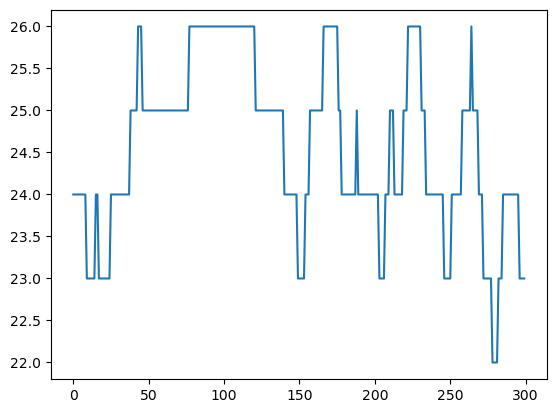

In [4]:
plt.plot(input_matrix[0])

In [5]:
zeros_idx = np.where(np.sum(input_matrix, axis=1) == 0)[0]

In [6]:
print(f"there are {len(zeros_idx)} rows with only 0s in the input matrix")

there are 468 rows with only 0s in the input matrix


In [7]:
a = np.delete(input_matrix, zeros_idx, axis=0)
a.shape

(46082, 300)

In [8]:
np.savetxt('hypnogram_input.csv', a, fmt="%d", delimiter=",")

The output matrix

In [9]:
b = np.loadtxt('./BinaryOutput_SpO2.txt', dtype=str)
b = b.astype(int)

In [10]:
b = np.delete(b, zeros_idx)

In [11]:
b.shape

(46082,)

In [12]:
np.savetxt('hypnogram_output.csv', b, fmt="%d", delimiter=",")

## Data quantization (4 bits)

In [49]:
x = np.loadtxt('./SpO2_input.csv', dtype=int, delimiter=',')
y = np.loadtxt('./SpO2_output.csv', dtype=int, delimiter=',')
print(f"{np.max(x) = }, {np.min(x) = }")

np.max(x) = 31, np.min(x) = 0


In [50]:
x_4bit = (x - np.min(x)) / (np.max(x) - np.min(x))  # to [0, 1]
x_4bit = np.rint(x_4bit * 2**4)  # to 4 bits
print(f"{np.max(x_4bit) = }, {np.min(x_4bit) = }")

np.max(x_4bit) = 16.0, np.min(x_4bit) = 0.0


In [51]:
x_4bit

array([[12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 14., 14., 14.],
       [12., 12., 12., ..., 12., 12., 12.],
       ...,
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [13., 13., 13., ..., 13., 13., 13.]])

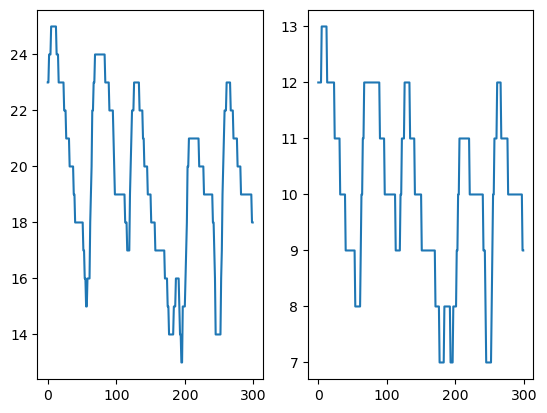

In [58]:
idx = 100
plt.subplot(1, 2, 1); plt.plot(x[idx])
plt.subplot(1, 2, 2); plt.plot(x_4bit[idx])

In [6]:
x_train.shape, y_train.shape

((36865, 300), (36865,))

In [7]:
x_test = x[split_index:, :]
y_test = y[split_index:]

In [8]:
x_test.shape, y_test.shape

((9217, 300), (9217,))

In [60]:
2**16+1

65537

In [1]:
2**5

32